<a href="https://colab.research.google.com/github/soyoonjeong/MachineLearning/blob/main/4_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 01. 분류의 개요

**분류** : 학습 데이터를 머신러닝 알고리즘으로 **학습**(모델생성) → 미지의 레이블 값 **예측** 

알고리즘 : 나이브 베이즈, 로지스틱 회귀, 결정 트리, 서포트 벡터 머신, 최소 근접 알고리즘, 신경망, 앙상블(배깅, 부스팅)

# 02. 결정 트리
데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙 만듦

PROBLEM : 트리의 깊이가 깊어질수록 결정 트리의 예측 성능 저하될 가능성 높음

SOLUTION : 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 **정보 균일도**가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦 

- **정보 이득** = 1 - 엔트로피 지수(혼잡도), 정보 이득이 높을수록 엔트로피 낮고 혼잡도 낮음
- **지니 계수** = 불평등 지수, 지니 계수가 낮을 수록 데이터 균일도 높음

⭐ 정보 이득이 높거나 지니 계수가 낮은 속성을 기준으로 분할

- 의사결정나무를 이용한 분류 학습 (정보 이득, 지니 계수)
    1. 여러가지 독립 변수 중 하나의 독립 변수를 선택하고 그 독립 변수에 대한 기준값(threshold)를 정함 ( 정보 획득량, 즉 균일도가 가장 높은 독립 변수와 기준값 )
    2. 전체 학습 데이터 집합(부모노드)를 해당 독립 변수의 값보다 작은 데이터 그룹(자식노드1), 해당 독립 변수의 값보다 큰 데이터 그룹(자식노드2)로 나눔
    3. 각각의 자식 노드에 대해 1~2의 단계를 반복해 하위의 자식노드를 만듦

## 결정 트리 모델의 특징

장점 

- 균일도 기반이어서 쉽고 직관적임
- 피처의 스케일링이나 정규화 등의 사전 가공의 영향도가 크지 않음

단점

- 트리의 깊이가 깊어지면 과적합으로 알고리즘 성능 떨어짐
- → 트리의 크기를 사전에 제한하는 튜닝 필요(완벽한 규칙은 만들 수 없다!)

## 결정 트리 파라미터

- min_samples_split : 노드를 분할하기 위한 최소 샘플 데이터 수, 작게 설정할수록 과적합
- min_samples_leaf : 리프 노드가 되기 위한 최소한의 샘플 데이터 수, 비대칭 데이터 경우 생각
- max_features : 최적의 분할을 위해 고려할 최대 피처 개수
- max_depth : 트리의 최대 깊이 규정
- max_leaf_nodes : 리프 노드의 최대 개수

## 결정 트리 모델의 시각화

graphiz 패키지 사용

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=49)

# 붓꽃 데이터 로딩 후 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state = 100)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=49)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file='tree.dot',class_names = iris_data.target_names,feature_names = iris_data.feature_names, impurity = True,filled =True)


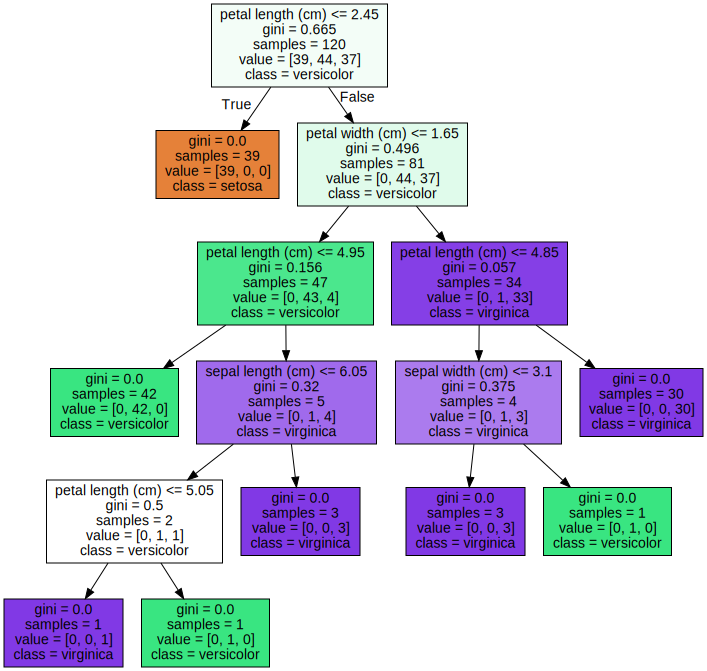

In [ ]:
import graphviz

with open('tree.dot') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.008 0.019 0.586 0.388]
sepal length (cm) : 0.008
sepal width (cm) : 0.019
petal length (cm) : 0.586
petal width (cm) : 0.388


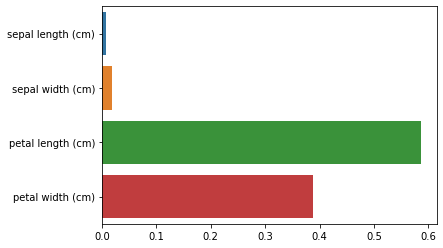

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print("{0} : {1:.3f}".format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y= iris_data.feature_names)

## 결정 트리 과적합

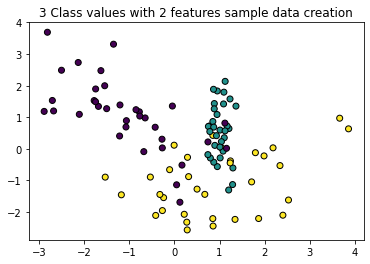

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 features sample data creation")
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state = 0)
plt.scatter(X_features[:,0],X_features[:,1], marker='o', c = y_labels, edgecolor='k')

In [ ]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

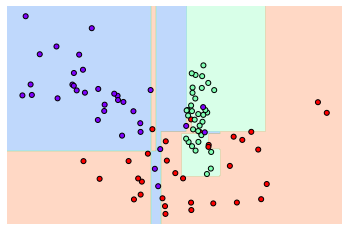

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

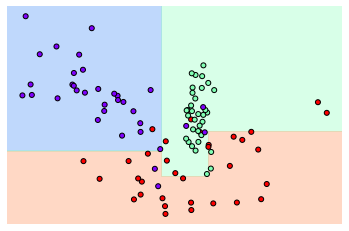

In [ ]:
# min_samples_leaf = 6으로 설정하면서 깊이 제어 
dt_clf = DecisionTreeClassifier(min_samples_leaf = 6).fit(X_features, y_labels)
visualize_boundary(dt_clf,X_features, y_labels)

하이퍼파라미터 튜닝으로 과적합 해결 !!

## 결정트리 실습 - 사용자 행동 인식 데이터 세트

### 데이터 전처리

'features.txt' 파일은 피처 인덱스와 피처명을 가지고 있음 -> 피처의 명칭만 간략히 확인

In [ ]:
feature_name_df = pd.read_csv("/content/drive/MyDrive/datasets/human_activity/features.txt", sep='\s+',
                               header=None,names=["column_index","column_name"])
feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [ ]:
feature_name = feature_name_df.iloc[:,1].values.tolist() # 피처명 index 제거하고 피처명만 리스트 객체로 생성한 뒤 10개만 추출
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

중복된 피처명들 처리 -> 원본 피처명에 _1, _2 추가로 부여

In [ ]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count()) # 중복된 피처명 개수 
feature_dup_df[feature_dup_df["column_index"]>1].head() # 중복된 피처

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [ ]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt']) # 몇번째 중복된 데이터인지 확인
  # cumcount : 각 그룹의 각 항목에 0부터 해당 그룹의 길이-1까지 번호 매기기 
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1]) # 뒤에 중복 인덱스 붙여주기
                                                                                if x[1]>0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'], axis = 1)
  return new_feature_name_df

In [ ]:
def get_human_dataset():
  feature_name_df = pd.read_csv("/content/drive/MyDrive/datasets/human_activity/features.txt", sep='\s+',
                                header=None, names=['column_index','column_name'])
  new_feature_name_df = get_new_feature_name_df(feature_name_df) # 중복된 피처명 수정
  feature_name = new_feature_name_df.iloc[:,1].values.tolist() # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  X_train = pd.read_csv("/content/drive/MyDrive/datasets/human_activity/train/X_train.txt",sep='\s+',names=feature_name)
  X_test = pd.read_csv("/content/drive/MyDrive/datasets/human_activity/test/X_test.txt",sep='\s+',names=feature_name)
  y_train = pd.read_csv("/content/drive/MyDrive/datasets/human_activity/train/y_train.txt", sep='\s+',header=None, names=['action'])
  y_test = pd.read_csv("/content/drive/MyDrive/datasets/human_activity/test/y_test.txt", sep='\s+',header=None, names=['action'])

  return X_train,X_test,y_train, y_test

X_train,X_test, y_train, y_test = get_human_dataset()

In [ ]:
X_train.info() # 7351개의 행, 561개의 열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [ ]:
y_train['action'].value_counts() # 고르게 분포

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

### 파라미터 디폴트로 모델 예측 수행

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

print('DecisionTreeClassifier의 기본 하이퍼 파라미터: \n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier의 기본 하이퍼 파라미터: 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


### max_depth 변화줘서 모델 예측 수행 

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth':[6,8,10,12,16,20,24]
}
grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring='accuracy',cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print("GridSearchCV 최적 하이퍼 파라미터:", grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [ ]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.726161,0.374621,0.016272,0.005388,6,{'max_depth': 6},0.813732,0.872876,0.819728,0.865986,0.881633,0.850791,0.028313,5
1,2.942172,0.666804,0.007839,0.000156,8,{'max_depth': 8},0.820530,0.819850,0.855102,0.868707,0.891156,0.851069,0.027719,3
2,3.067336,0.080981,0.007730,0.000146,10,{'max_depth': 10},0.799456,0.814412,0.863265,0.891156,0.887755,0.851209,0.037707,2
3,3.440694,0.161920,0.008404,0.001027,12,{'max_depth': 12},0.794697,0.813052,0.848980,0.877551,0.886395,0.844135,0.035598,7
4,3.842816,0.278848,0.007934,0.000112,16,{'max_depth': 16},0.799456,0.818491,0.853061,0.887755,0.897959,0.851344,0.038140,1
5,4.119611,0.358836,0.009633,0.002065,20,{'max_depth': 20},0.802855,0.818491,0.856463,0.877551,0.898639,0.850800,0.035718,4
6,4.278267,0.628445,0.007736,0.000101,24,{'max_depth': 24},0.796057,0.818491,0.856463,0.877551,0.898639,0.849440,0.037597,6


In [ ]:
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [ ]:
max_depths = [6,8,10,12,16,20,24]
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth = depth, random_state = 49)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print("max_depth = {0} 정확도 : {1:.4f}".format(depth, accuracy))

max_depth = 6 정확도 : 0.8561
max_depth = 8 정확도 : 0.8721
max_depth = 10 정확도 : 0.8700
max_depth = 12 정확도 : 0.8697
max_depth = 16 정확도 : 0.8673
max_depth = 20 정확도 : 0.8605
max_depth = 24 정확도 : 0.8605


깊이가 깊어질수록 테스트 데이터 세트의 정확도는 더 떨어짐 => max_depth = 8 이 best! 

### max_depth, min_samples_split에 변화줘서 모델 예측 수행 

In [ ]:
params = {
    'max_depth':[8,12,16,20],
    'min_samples_split':[16,24]
}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose = 1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 :',grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8517
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_split': 16}


In [ ]:
best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)
accuracy = accuracy_score(pred1, y_test)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8731


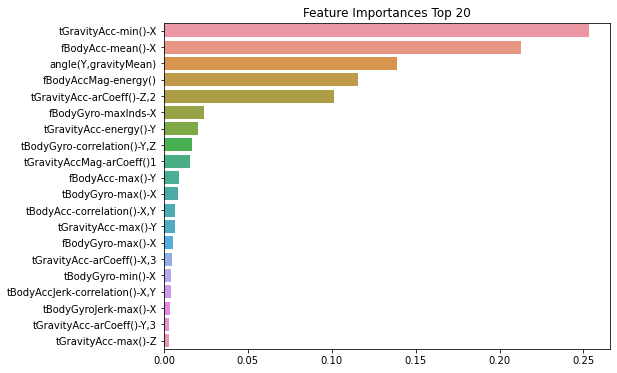

In [ ]:
import seaborn as sns

ftr_importances_values = best_dt_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

# 03. 앙상블 학습

### 앙상블 학습 개요

: 여러 개의 분류기의 예측을 결합해 보다 정확한 최종 예측 도출

- **보팅** : 서로 다른 알고리즘이 같은 데이터 세트를 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측 결과 선정
- **배깅** : 같은 유형의 알고리즘 기반 분류기가 각각 다르게 샘플링된 데이터 세트를 학습하고 예측한 결과를 가지고 보팅을 통해 최종 예측 결과 선정

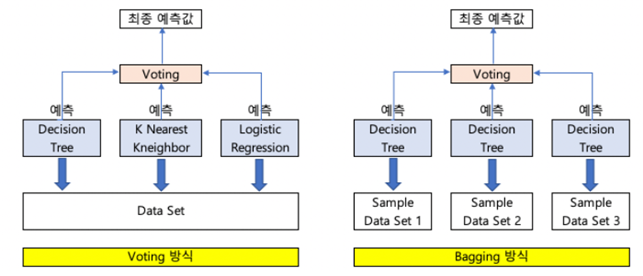

- **부스팅** : 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에게는 가중치를 부여하여 학습과 예측 진행
- **스태킹** : 다른 모델의 예측 결괏값을 학습 데이터로 만들어 학습하고 결과를 예측하는 방법

### 보팅 유형 - 하드보팅(Hard Voting)과 소프트 보팅(Soft Voting)

- **하드보팅** : 다수결 원칙
- **소프트보팅** : 각 레이블마다 모든 분류기들의 결정 확률을 평균해서 가장 확률이 높은 레이블 값을 최종 보팅 결괏값으로 선정

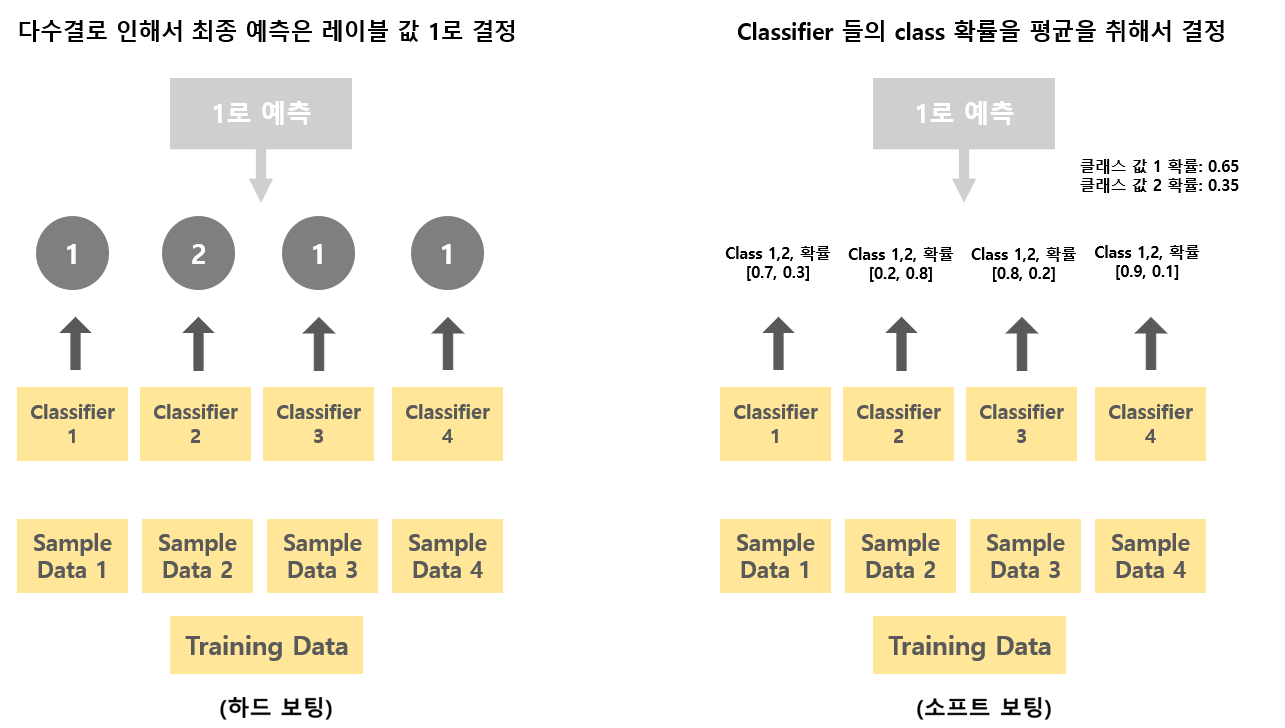

⭐ 일반적으로 소프트 보팅이 하드 보팅보다 성능 좋음

### 보팅 분류기(Voting Classifier)
위스콘신 유방암 데이터 세트 분류 실습 <BR>
로지스틱 회귀와 KNN을 기반으로 하여 소프트 보팅 방식으로 보팅 분류기 만들기

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)

vo_clf = VotingClassifier(estimators = [('LR', lr_clf),('KNN',knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 49)

# VotingClassfier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print("Voting 분류기 정확도 : {0:.4f}".format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print("{0} 정확도 : {1:.4f}".format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도 : 0.9298
LogisticRegression 정확도 : 0.9123
KNeighborsClassifier 정확도 : 0.9474


PROBLEM : 결정트리 알고리즘은 쉽고 직관적이지만 예외 상황에 집착하여 과적합이 발생하기 쉽다 <BR>
SOLUTION : 많은 결정트리 분류기를 결합하여 다양한 상황을 학습하게 함으로써 단점을 보완하고 장점을 취함 

# 04. 랜덤 포레스트

### 랜덤 포레스트의 개요 및 실습

- 배깅의 한 종류
- 기반 알고리즘 : 결정트리 ⇒ 쉽고 직관적
- 여러 개의 결정 트리 분류기가 각자의 데이터를 샘플링해 개별적으로 학습 수행 → 최종적으로 모든 분류기가 보팅을 통해 예측 결정
- 부트스트래핑 분할 방식 : 전체 데이터에서 여러 개의 데이터 세트를 중첩되게 분리 (전체 데이터 건수 = 서브세트의 데이터 건수 )
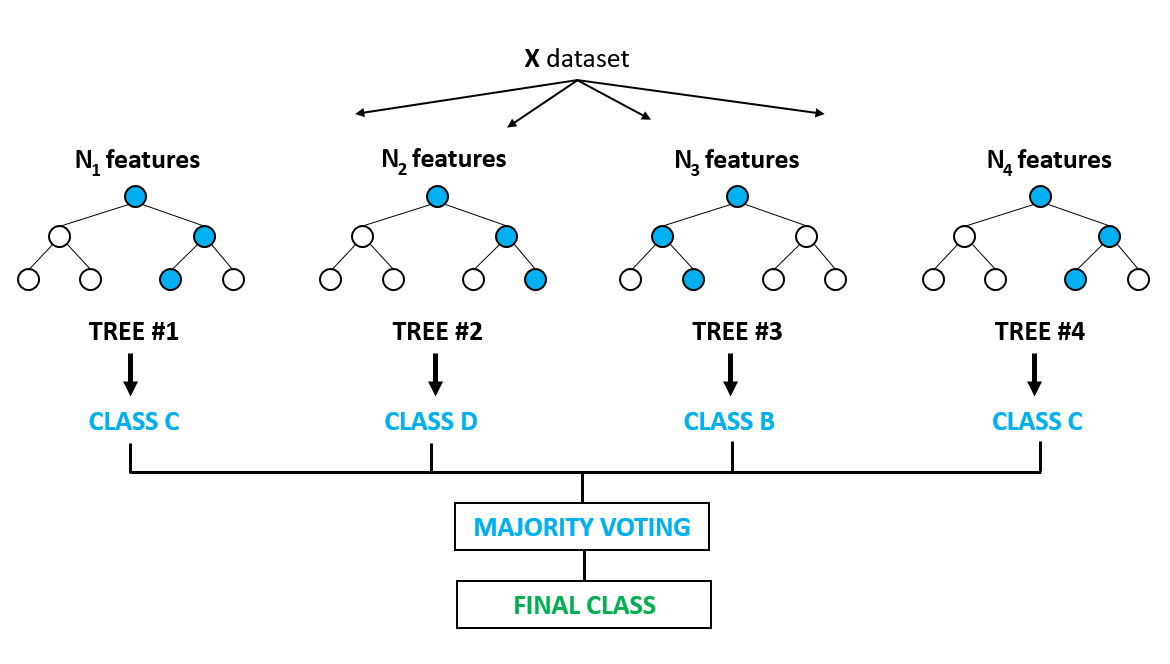

랜덤 포레스트 사용하여 사용자 행동 인식 데이터 세트 분류 실습

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print("랜덤 포레스트 정확도 : {0:.4f}".format(accuracy))

랜덤 포레스트 정확도 : 0.9253


### 랜덤 포레스트 하이퍼 파라미터 및 튜닝
랜덤 포레스트 사용하여 하이퍼 파라미터 튜닝하며 사용자 행동 인식 데이터 세트 분류 실습


In [ ]:
from sklearn.model_selection import GridSearchCV
params ={
    'n_estimators':[100], # 결정트리 개수 
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}
rf_clf = RandomForestClassifier(random_state =0, n_jobs = -1) # 모든 CPU 코어 이용해 학습
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print("최적 하이퍼 파라미터 :\n", grid_cv.best_params_)
print("최고 예측 정확도 : {0:.4f}".format(grid_cv.best_score_))

최적 하이퍼 파라미터 :
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 : 0.9180


In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=6, min_samples_split=8, random_state = 0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print("예측 정확도 : {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9209


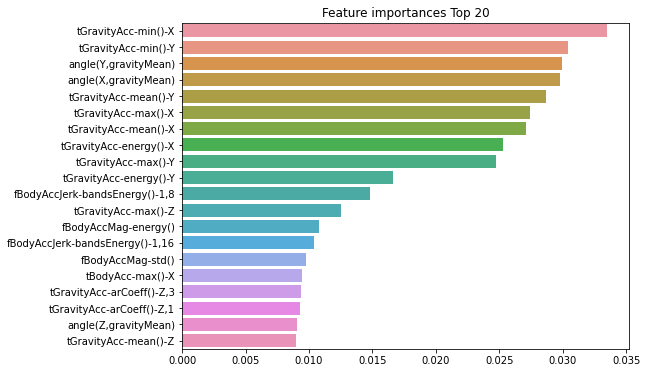

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize = (8,6))
plt.title("Feature importances Top 20")
sns.barplot(x=ftr_top20, y = ftr_top20.index)
plt.show()

# GBM(Gradient Boosting Machine)

## GBM의 개요 및 실습
- 부스팅의 한 종류 
- **부스팅** : 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습 
- 가중치 업데이트를 **경사 하강법**을 이용함 

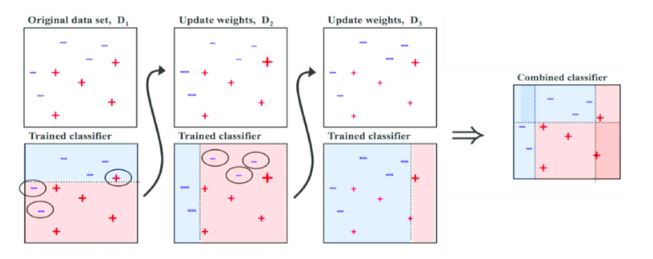

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간 : {0:.4f}'.format(time.time()-start_time))

GBM 정확도 : 0.9386
GBM 수행 시간 : 816.1647


## GBM 하이퍼 파라미터 및 튜닝
- loss : 비용함수 (default:deviance)
- learning_rate : 학습률 
- n_estimators : weak learner의 개수 
- subsample : 샘플링 비율

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid = params, cv = 2, verbose = 1)
grid_cv.fit(X_train, y_train)
print("최적 하이퍼 파라미터:", grid_cv.best_params_)
print("최고 예측 정확도 : ",grid_cv.best_score_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터: {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도 :  0.9001632208922742


# XGBoost

## XGBoost 개요
- **뛰어난 예측 성능** : 분류 & 회귀
- **GBM 대비 빠른 수행 시간** : 병렬 CPU 환경에서 병렬 학습 가능해 GBM보다 빠름
- **과적합 규제**
- **Tree pruning(나무 가지치기)** : 더 이상 긍정 이득이 없는 분할을 가지치기 해서 분할 수를 더 줄일 수 있음
- **자체 내장된 교차 검증** : 교차 검증 수행해 최적화된 반복 수행 횟수 가질 수 있음, 조기 중단 기능
- **결손값 자체 처리** 

- **파이썬 래퍼 XGBoost 모듈** : 초기의 독자적인 XGBoost 프레임워크 기반<br>사이킷런 고유의 아키텍처(fit, predict,...) 적용 X<br>다양한 유틸리티(cross_val_score, GridSearchCV,...) 사용 X
- **사이킷런 래퍼 XGBoost 모듈** : 사이킷런과 연동되는 모듈<br>사이킷런 고유의 아키텍처(fit, predict,...) 적용 O<br>다양한 유틸리티(cross_val_score, GridSearchCV,...) 사용 O

## 파이썬 래퍼 XGBoost 하이퍼 파라미터 


**주요 일반 파라미터** : 디폴트 잘 안 바꿈
- booster
- slient
- nthread : 디폴트는 CPU 전체 스레드 사용

**주요 부스터 파라미터** : 트리 최적화, 부스팅, regularization 등
- eta : GBM의 학습률 같은 파라미터, 0.01~0.2
- num_boost_rountds : GBM의 n_estimators
- min_child_weight : 트리에서 추가적으로 가지를 나눌지 결정하기 위해 필요한 데이터의 weight 총합, 클수록 과적합 감소
- gamma : 트리의 리프 노드를 추가적으로 나눌지를 결정하는 최소 손실 감소 값, 클수록 과적합 감소 
- max_depth : 3~10
- sub_sample : GBM의 subsample, 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율
- colsample_bytree : GBM의 max_features, 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율
- lambda : l2 정규화 적용 값, 클수록 과적합 감소
- alpha : ㅣ1 정규화 적용 값, 클수록 과적합 감소
- scale_pos_weight : 균형 유지 파라미터 

**학습 태스크 파라미터** 
- objective : 최솟값을 가져야 할 손실 함수 정의 
  - 이진분류 : binary:logistic
  - 다중분류 : multi:softmax, multi:softprob
- eval_metric : 검증에 사용되는 함수
  - 회귀 : rmse
  - 분류 : error

**과적합 규제 방법**
- eta 값 🔻 & num_round 🔺
- max_depth 🔻
- min_child_weight 🔺
- gamma 🔺
- sub_sample, colsample_bytree 조정 

## 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data = X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# 레이블 데이터 분포 확인
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 49)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [ ]:
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터 세트를 DMatrix로 변환
# DMatrix : 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost만의 전용 데이터 세트 
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)

In [ ]:
params = {
    'max_depth':3, # 최대 깊이
    'eta':0.1, # 학습률
    'objective':'binary:logistic', # 이진분류 손실함수
    'eval_metric':'logloss'
}
num_rounds = 400 # 400번 반복

In [ ]:
wlist = [(dtrain, 'train'),(dtest,'eval')]
xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = num_rounds,
                      early_stopping_rounds = 100, evals = wlist) # early_stopping_rounds는 조기중단 기능 (100번동안 지표 개선 없을 시 중단)

[0]	train-logloss:0.610335	eval-logloss:0.611847
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.54205	eval-logloss:0.547229
[2]	train-logloss:0.483494	eval-logloss:0.491863
[3]	train-logloss:0.434888	eval-logloss:0.446011
[4]	train-logloss:0.39314	eval-logloss:0.409033
[5]	train-logloss:0.354074	eval-logloss:0.374398
[6]	train-logloss:0.320224	eval-logloss:0.343558
[7]	train-logloss:0.290489	eval-logloss:0.319792
[8]	train-logloss:0.265495	eval-logloss:0.296412
[9]	train-logloss:0.242369	eval-logloss:0.276955
[10]	train-logloss:0.221907	eval-logloss:0.261379
[11]	train-logloss:0.204533	eval-logloss:0.242992
[12]	train-logloss:0.188287	eval-logloss:0.231627
[13]	train-logloss:0.17428	eval-logloss:0.217158
[14]	train-logloss:0.1619	eval-logloss:0.203148
[15]	train-logloss:0.150062	eval-logloss:0.192854
[16]	train-logloss:0.139487	eval-logloss:0.184148
[17]	train-logl

In [ ]:
pred_probs = xgb_model.predict(dtest) # 파이썬 래퍼 XGBoost는 예측 확률 반환
preds = [1 if x>0.5 else 0 for x in pred_probs]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[37  4]
 [ 1 72]]
정확도: 0.9561, 정밀도: 0.9474, 재현율: 0.9863,    F1: 0.9664, AUC:0.9943


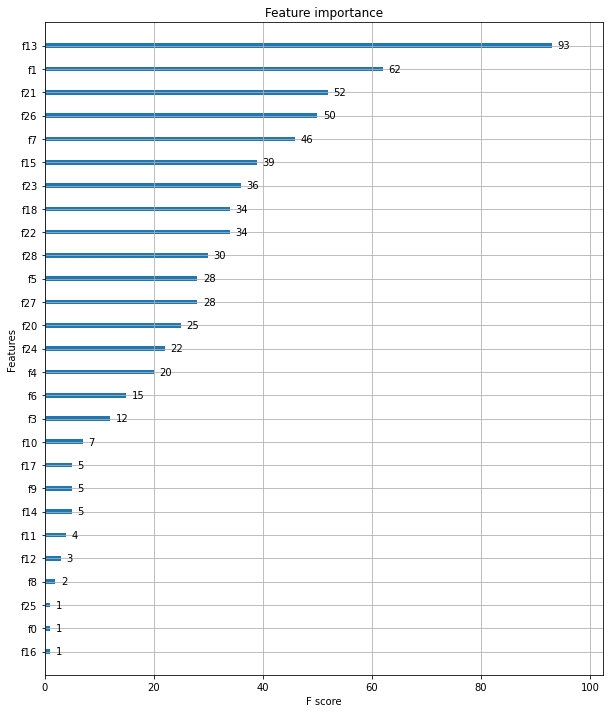

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_model, ax = ax)

## 사이킷런 래퍼 XGBoost의 개요 및 적용

### 조기중단 없이 

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_detph = 3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [ ]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[38  3]
 [ 1 72]]
정확도: 0.9649, 정밀도: 0.9600, 재현율: 0.9863,    F1: 0.9730, AUC:0.9947


### 조기중단 early_stopping_rounds = 100

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
evals = [(X_test,y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric= 'logloss',
                eval_set = evals, verbose = True) # 원래 성능평가는 테스트용 데이터로 하면 안됨
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.611846
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547229
[2]	validation_0-logloss:0.491863
[3]	validation_0-logloss:0.446011
[4]	validation_0-logloss:0.409034
[5]	validation_0-logloss:0.374398
[6]	validation_0-logloss:0.343558
[7]	validation_0-logloss:0.319792
[8]	validation_0-logloss:0.296412
[9]	validation_0-logloss:0.276955
[10]	validation_0-logloss:0.261379
[11]	validation_0-logloss:0.242992
[12]	validation_0-logloss:0.231627
[13]	validation_0-logloss:0.217158
[14]	validation_0-logloss:0.203148
[15]	validation_0-logloss:0.192854
[16]	validation_0-logloss:0.184148
[17]	validation_0-logloss:0.178609
[18]	validation_0-logloss:0.171142
[19]	validation_0-logloss:0.166165
[20]	validation_0-logloss:0.158002
[21]	validation_0-logloss:0.15375
[22]	validation_0-logloss:0.149113
[23]	validation_0-logloss:0.146354
[24]	validation_0-logloss:0.142632
[25]	validation_0-logloss:0.1369
[26]	validation_0-logloss:0.134792

In [ ]:
get_clf_eval(y_test, ws100_preds.reshape(-1,1), ws100_pred_proba)

오차 행렬
[[37  4]
 [ 1 72]]
정확도: 0.9561, 정밀도: 0.9474, 재현율: 0.9863,    F1: 0.9664, AUC:0.9950


### 조기중단 early_stopping_rounds = 10

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
evals = [(X_test,y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 10, eval_metric= 'logloss',
                eval_set = evals, verbose = True) # 원래 성능평가는 테스트용 데이터로 하면 안됨
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.611846
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547229
[2]	validation_0-logloss:0.491863
[3]	validation_0-logloss:0.446011
[4]	validation_0-logloss:0.409034
[5]	validation_0-logloss:0.374398
[6]	validation_0-logloss:0.343558
[7]	validation_0-logloss:0.319792
[8]	validation_0-logloss:0.296412
[9]	validation_0-logloss:0.276955
[10]	validation_0-logloss:0.261379
[11]	validation_0-logloss:0.242992
[12]	validation_0-logloss:0.231627
[13]	validation_0-logloss:0.217158
[14]	validation_0-logloss:0.203148
[15]	validation_0-logloss:0.192854
[16]	validation_0-logloss:0.184148
[17]	validation_0-logloss:0.178609
[18]	validation_0-logloss:0.171142
[19]	validation_0-logloss:0.166165
[20]	validation_0-logloss:0.158002
[21]	validation_0-logloss:0.15375
[22]	validation_0-logloss:0.149113
[23]	validation_0-logloss:0.146354
[24]	validation_0-logloss:0.142632
[25]	validation_0-logloss:0.1369
[26]	validation_0-logloss:0.134792


In [ ]:
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

오차 행렬
[[37  4]
 [ 1 72]]
정확도: 0.9561, 정밀도: 0.9474, 재현율: 0.9863,    F1: 0.9664, AUC:0.9937


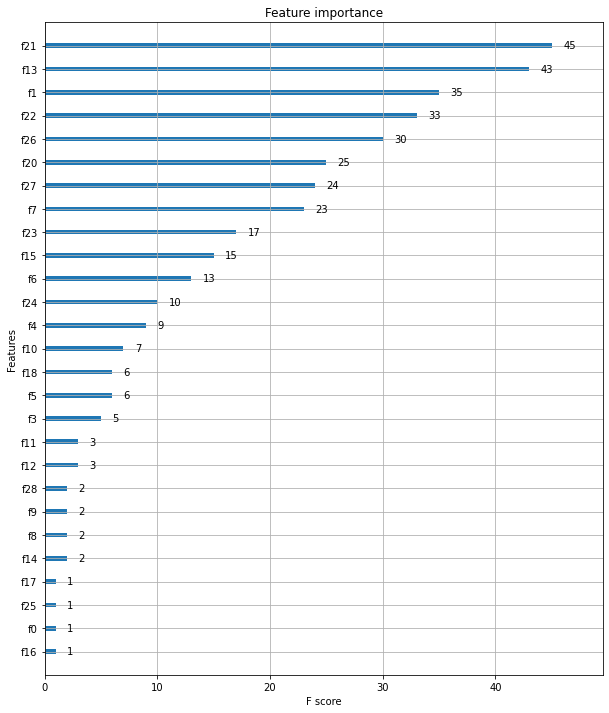

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_wrapper, ax = ax)

# LightGBM

- 더 빠른 학습과 예측 수행 시간 
- 더 작은 메모리 사용량 
- 카테고리형 피처의 자동 변환과 최적 분할 : 원-핫 인코딩 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분할 수행 
- **리프 중심 트리 분할** 수행 : 균형 맞추지 않고 최대 손실 값을 가지는 리프 노드를 지속적으로 분할하면서 깊고 비대칭적인 규칙 트리 생성 
- 적은 데이터 세트(10000건 이하)에 적용할 경우 과적합 발생 쉬움

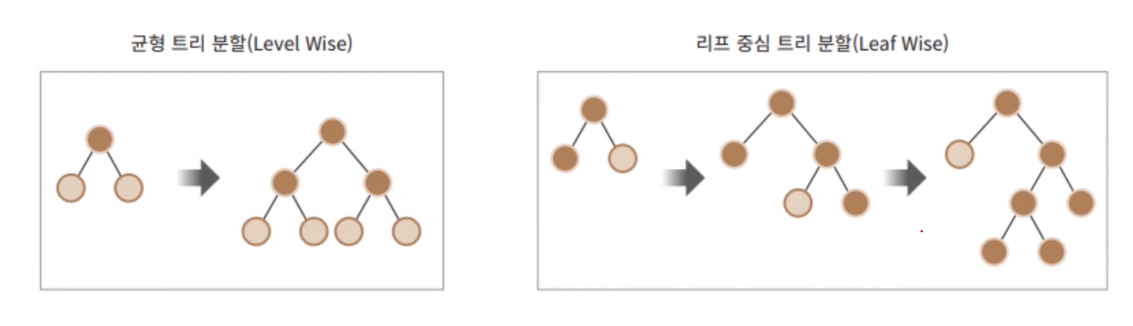

## LightGBM 하이퍼 파라미터

- num_iterators : 트리 개수 
- learning_rate : 학습률
- max_depth : 최대 깊이
- min_data_in_leaf : = min_samples_leaf, 리프노드가 되기 위해서 최소한으로 필요한 레코드 수
- num_leaves : 최대 리프 개수
- boosting : 부스팅의 트리를 생성하는 알고리즘 기술, gbdt(그래디언트 부스팅 결정트리) or rf(랜덤 포레스트)
- bagging_fraction : 과적합 제어, 데이터 샘플링 비율
- feature_fraction : = max_features, colsample_bytree, 무작위로 선택하는 피처의 비율
- lambda_l2, lambda_l1
- objective : 손실함수 

## 하이퍼 파라미터 튜닝 방안

- num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth 조정
  - num_leaves의 개수가 높아질수록 정확도 높아지고,트리의 깊이가 깊어지고 복잡해짐
  - min_data_in_leaf가 높아질수록 과적합 방지할 수 있음 (트리가 덜 깊어짐)
  - max_depth가 낮을수록 과적합 방지
- learning_rate를 작게하면서 n_estimator를 크게 하기 
- lambda_l1, lambda_l2와 같은 규제 파라미터 적용하여 과적합 제어
- 학습에 사용할 피처의 개수나 샘플링 레코드 개수 줄이기 위해 colsample_bytree, subsample 적용하여 과적합 제어

## LightGBM 적용 - 위스콘신 유방암 예측

In [ ]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier import
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size = 0.2, random_state = 49)

lgbm_wrapper = LGBMClassifier(n_estimators = 400)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'logloss',
                 eval_set = evals, verbose = True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.577451	valid_0's binary_logloss: 0.577451
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.515783	valid_0's binary_logloss: 0.515783
[3]	valid_0's binary_logloss: 0.468961	valid_0's binary_logloss: 0.468961
[4]	valid_0's binary_logloss: 0.430036	valid_0's binary_logloss: 0.430036
[5]	valid_0's binary_logloss: 0.393277	valid_0's binary_logloss: 0.393277
[6]	valid_0's binary_logloss: 0.363103	valid_0's binary_logloss: 0.363103
[7]	valid_0's binary_logloss: 0.338392	valid_0's binary_logloss: 0.338392
[8]	valid_0's binary_logloss: 0.317737	valid_0's binary_logloss: 0.317737
[9]	valid_0's binary_logloss: 0.297846	valid_0's binary_logloss: 0.297846
[10]	valid_0's binary_logloss: 0.282267	valid_0's binary_logloss: 0.282267
[11]	valid_0's binary_logloss: 0.26607	valid_0's binary_logloss: 0.26607
[12]	valid_0's binary_logloss: 0.254736	valid_0's binary_logloss: 0.254736
[13]	valid_0's binary_logloss: 0.244523	valid_0'

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred = None, pred_proba = None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차 행렬')
  print(confusion)
  # ROC-AUC print 추가
  print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
  F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[37  4]
 [ 1 72]]
정확도: 0.9561, 정밀도: 0.9474, 재현율: 0.9863,  F1: 0.9664, AUC:0.9886


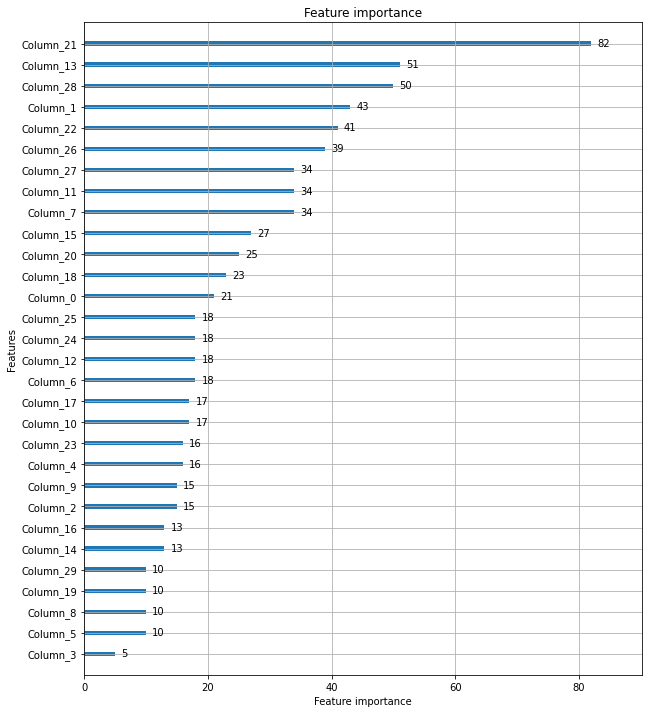

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10,12))
plot_importance(lgbm_wrapper, ax = ax)

# 분류실습 - 산탄데르 고객 만족도 예측

## 데이터 전처리 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("/content/drive/MyDrive/datasets/santander-customer-satisfaction/train.csv", encoding = 'latin-1')
print("dataset shape :", cust_df.shape)
cust_df.head()

dataset shape : (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [ ]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print("unsatifisfied의 비율 : {0:4f}".format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatifisfied의 비율 : 0.039569


불만족과 만족의 비율이 불균형적! 불만족의 비율 : 약 4%

In [ ]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


var3의 min이 -999999인게 이상함 => NaN이나 특정 예외 값을 -999999로 변환한 것으로 보임 

In [ ]:
cust_df['var3'].value_counts()[:10]

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

In [ ]:
cust_df['var3'].replace(-999999,2, inplace=True) # -999999를 가장 많은 2로 변환
cust_df.drop('ID', axis = 1, inplace = True) # ID는 의미없으므로 제거

X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape : {0}'.format(X_features.shape))

피처 데이터 shape : (76020, 369)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.2, random_state = 0)

train_cnt = y_train.count()
test_cnt = y_test.count()

print("학습 세트 shape : {0}, 테스트 세트 shape : {1}".format(X_train.shape, X_test.shape))

print("학습 세트 레이블 값 분포 비율")
print(y_train.value_counts()/train_cnt)
print("테스트 세트 레이블 값 분포 비율")
print(y_test.value_counts()/test_cnt)

학습 세트 shape : (60816, 369), 테스트 세트 shape : (15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64
테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


훈련, 테스트 데이터 레이블 분포 비율이 전체 데이터 분포 비율과 비슷하게 4% 정도임 

## XGBoost 모델 학습과 하이퍼 파라미터 튜닝